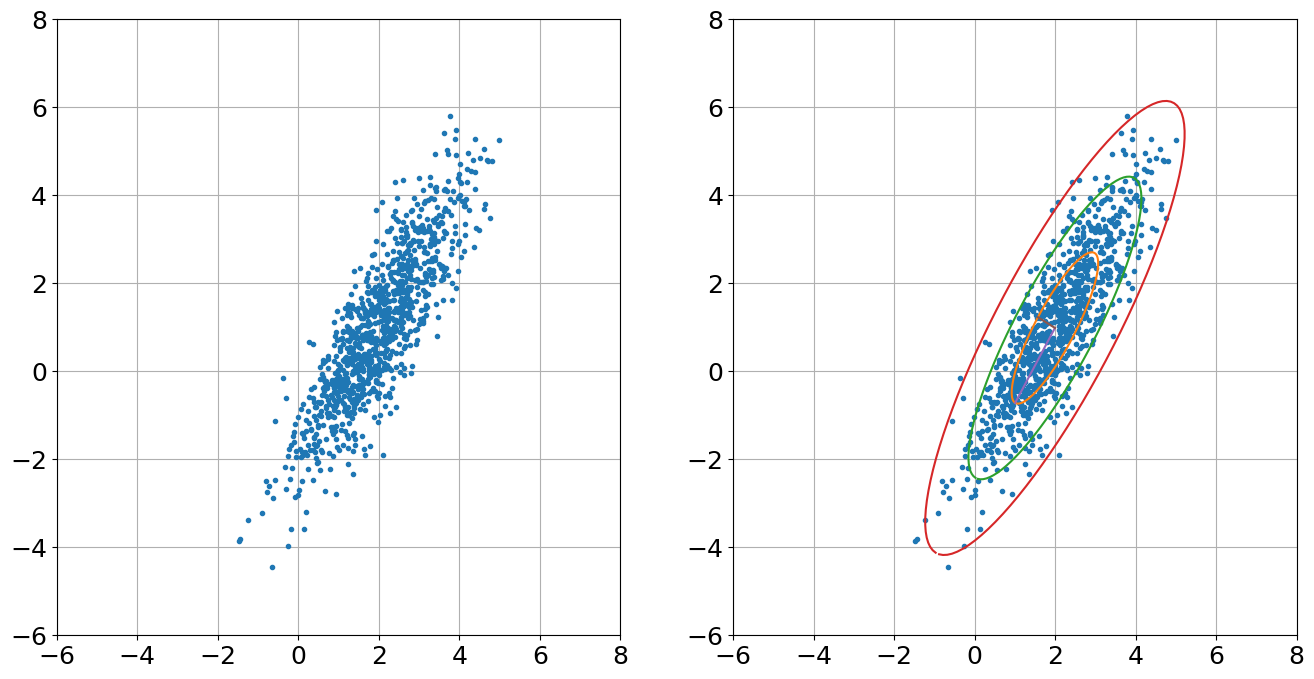

Theta
[0.         0.06283185 0.12566371 0.18849556 0.25132741 0.31415927
 0.37699112 0.43982297 0.50265482 0.56548668 0.62831853 0.69115038
 0.75398224 0.81681409 0.87964594 0.9424778  1.00530965 1.0681415
 1.13097336 1.19380521 1.25663706 1.31946891 1.38230077 1.44513262
 1.50796447 1.57079633 1.63362818 1.69646003 1.75929189 1.82212374
 1.88495559 1.94778745 2.0106193  2.07345115 2.136283   2.19911486
 2.26194671 2.32477856 2.38761042 2.45044227 2.51327412 2.57610598
 2.63893783 2.70176968 2.76460154 2.82743339 2.89026524 2.95309709
 3.01592895 3.0787608  3.14159265 3.20442451 3.26725636 3.33008821
 3.39292007 3.45575192 3.51858377 3.58141563 3.64424748 3.70707933
 3.76991118 3.83274304 3.89557489 3.95840674 4.0212386  4.08407045
 4.1469023  4.20973416 4.27256601 4.33539786 4.39822972 4.46106157
 4.52389342 4.58672527 4.64955713 4.71238898 4.77522083 4.83805269
 4.90088454 4.96371639 5.02654825 5.0893801  5.15221195 5.2150438
 5.27787566 5.34070751 5.40353936 5.46637122 5.52920307 5.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits import mplot3d
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 18})

# Data Creation
data_centered = np.array([2, 1])
pca_axis = np.array([2, 0.5])
theta = np.pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
n = 1000

# Creating data cloud 
X = R @ np.diag(pca_axis) @ np.random.randn(2, n) + np.diag(data_centered) @ np.ones((2,n))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

# Conduct PCA
Xavg = np.mean(X, axis=1)
B = X - np.tile(Xavg, (n,1)).T

U, S, Vt = np.linalg.svd(B/np.sqrt(n), full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:], X[1,:], '.')
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

theta = 2*np.pi*np.arange(0,1,0.01)

Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:], '-')
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:], '-')
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:], '-')

ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]))
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]))

plt.show()

print("Theta")
print(theta)
print("Xavg[0]")
print(Xavg[0])
print("Xavg[1]")
print(Xavg[1])
print("U[0,0]")
print(U[0,0])
print("U[1,0]")
print(U[1,0])
print("U[1,1]")
print(U[0,1])
print("U[1,1]")
print(U[1,1])
print("S[0]")
print(S[0])
print("S[1]")
print(S[1])

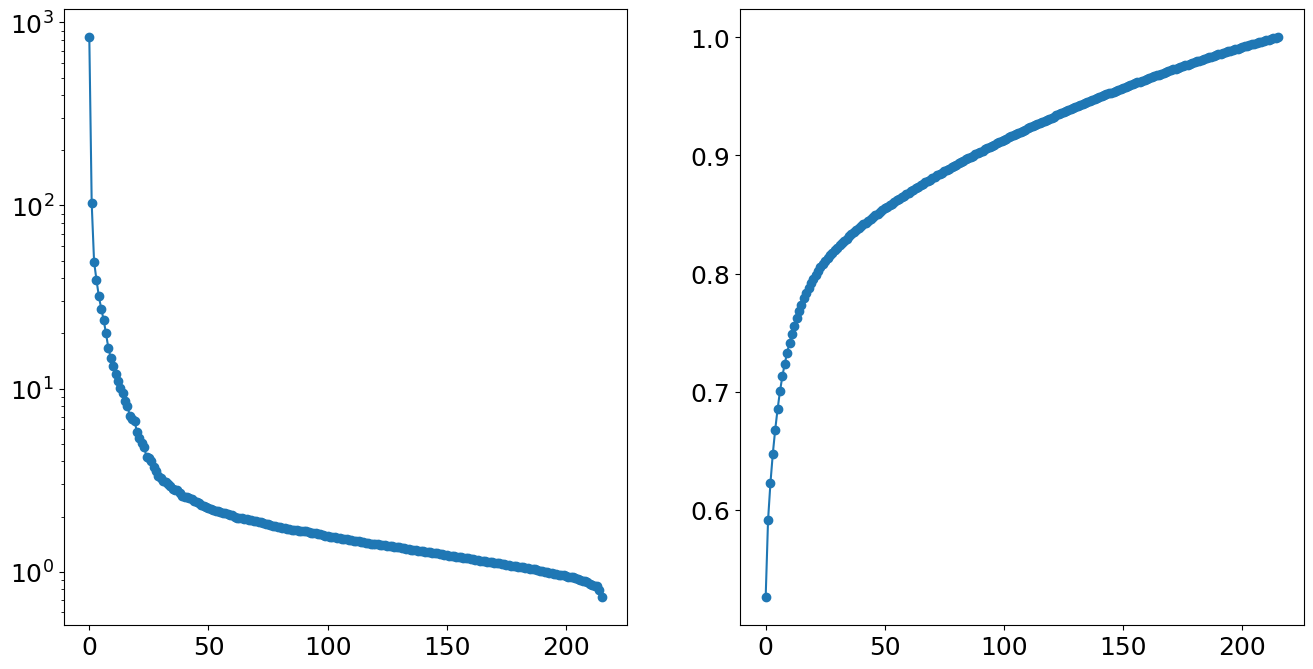

In [12]:
# Testing Example - Ovarian Cancer Data

data = np.loadtxt(os.path.join('ovariancancer_obs.csv'), delimiter=",")
cancer_result = open(os.path.join("ovariancancer_grp.csv"), "r")
groups = cancer_result.read().split("\n")

U, S, Vt = np.linalg.svd(data, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o')

plt.show()

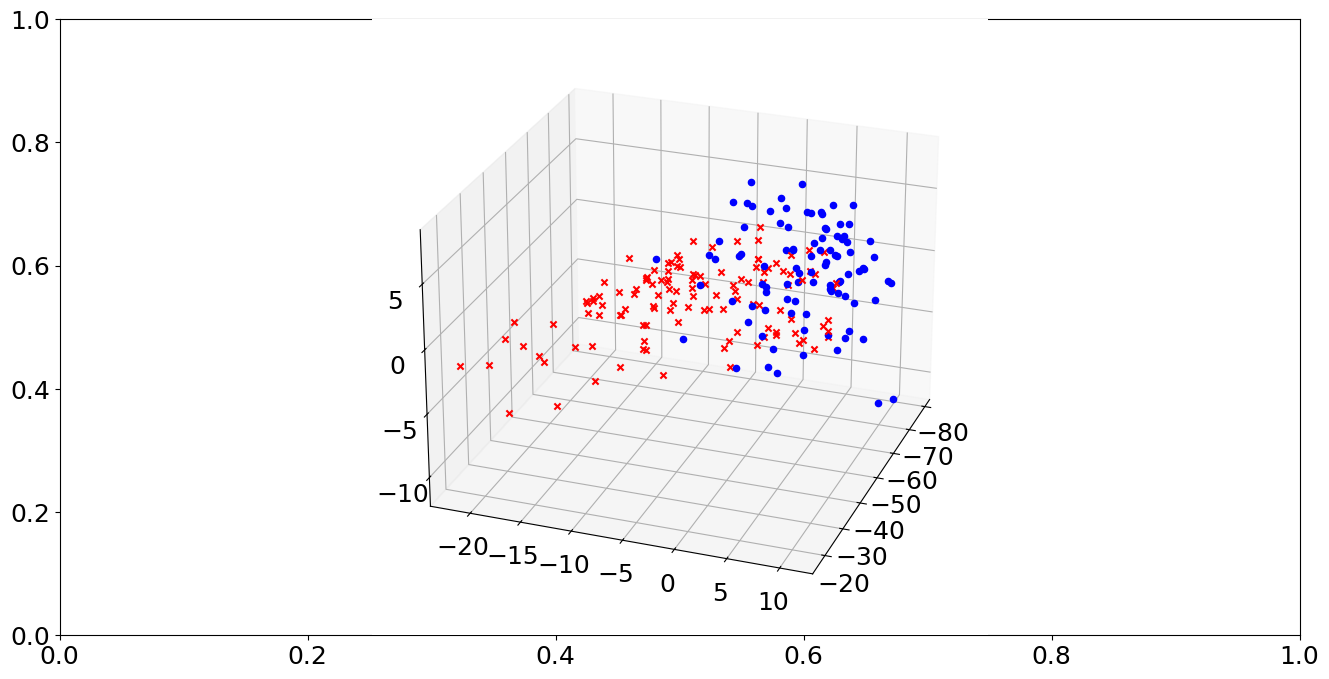

Vt[0,:]
[-0.00060164 -0.0005753  -0.00052043 ... -0.00048118 -0.00046371
 -0.00046603]


In [17]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax = plt.axes(projection='3d')

for j in range(data.shape[0]):
    x = Vt[0,:] @ data[j,:].T
    y = Vt[1,:] @ data[j,:].T
    z = Vt[2,:] @ data[j,:].T
    
    if groups[j] == 'Cancer':
        ax.scatter(x,y,z, marker='x', c="r")
    else:
        ax.scatter(x,y,z, marker='o', c="b")

ax.view_init(25,20)
plt.show()

print("Vt[0,:]")
print(Vt[0,:])
